In [4]:
import warnings
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
# import missingo as msno

warnings.filterwarnings('ignore')
pl.style.use('fivethirtyeight')


In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [10]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [17]:
# # This library is used to check missing values
# msno.matrix(train)
# msno.bar(test)

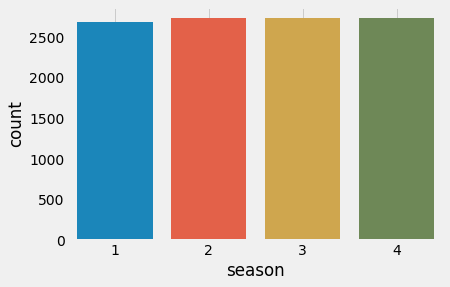

In [20]:
sns.countplot(train['season'])
pl.grid()

<AxesSubplot:xlabel='holiday', ylabel='count'>

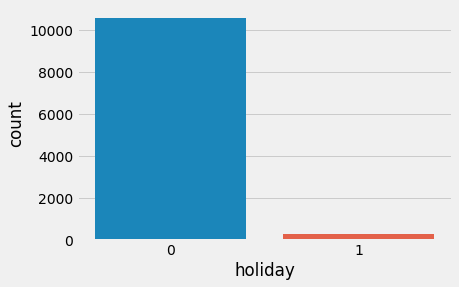

In [21]:
sns.countplot(train['holiday'])

<AxesSubplot:xlabel='season', ylabel='count'>

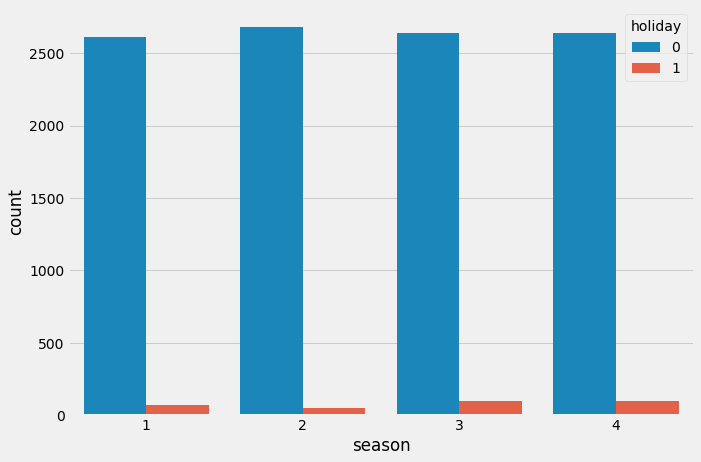

In [26]:
pl.figure(figsize=(10,7))
sns.countplot(train['season'],hue=train['holiday'])


<AxesSubplot:xlabel='holiday', ylabel='count'>

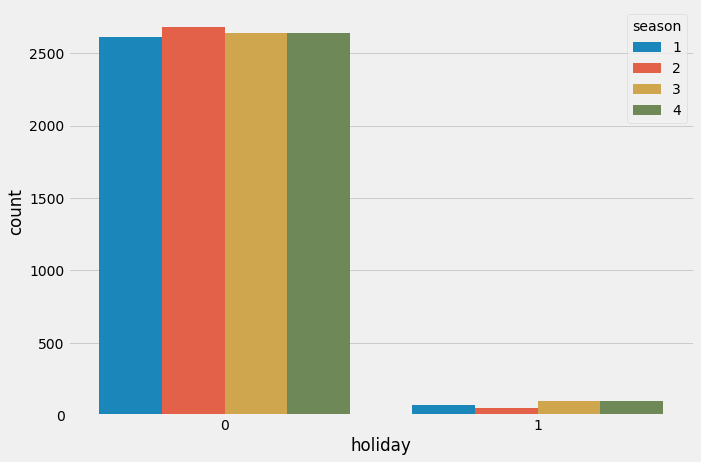

In [27]:
pl.figure(figsize=(10,7))
sns.countplot(train['holiday'],hue=train['season'])


In [36]:
temp_df=train.groupby(['season','weather'])['weather'].count()
temp_df

season  weather
1       1          1759
        2           715
        3           211
        4             1
2       1          1801
        2           708
        3           224
3       1          1930
        2           604
        3           199
4       1          1702
        2           807
        3           225
Name: weather, dtype: int64

<AxesSubplot:xlabel='season,weather'>

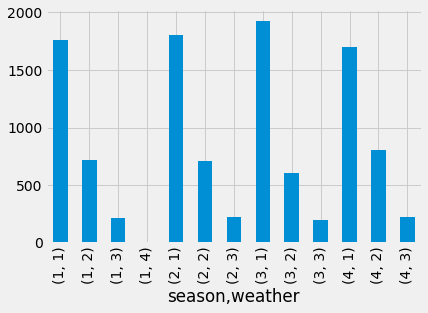

In [42]:
temp_df.plot(kind='bar')

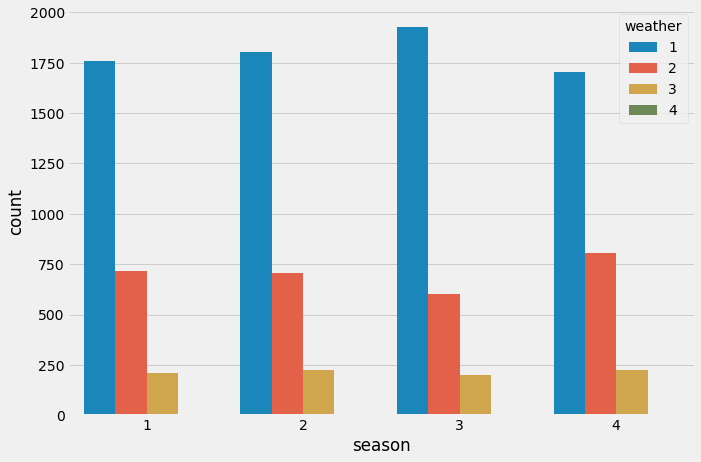

In [44]:
pl.figure(figsize=(10,7))
sns.countplot(train['season'],hue=train['weather'])
pl.show()